<a href="https://colab.research.google.com/github/RahulMimani-2024/Technological_Intervention_In_Tourism_Industry/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/monthly_tourist_arrivals_india_2002-2018.csv',usecols=[0])

In [ ]:
df.head()

,values
0,274215
1,262692
2,218473
3,160941
4,141508


In [ ]:
df.describe()

,values
count,2.040000e+02
mean,5.480792e+05
std,2.344708e+05
min,1.415080e+05
25%,3.697925e+05
50%,5.095055e+05
75%,7.182045e+05
max,1.225672e+06


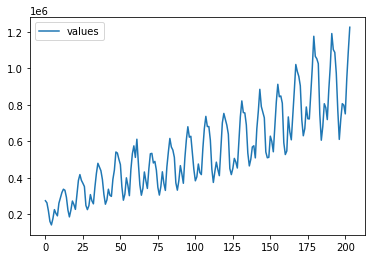

In [ ]:
df.plot();

In [ ]:
### Testing For Stationarity
#dickey fuller test
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(df['values'])

ADF Test Statistic : 0.47340825047942153
p-value : 0.9840420538524736
#Lags Used : 14
Number of Observations Used : 189
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df['fake_val'] = df['values'] - df['values'].shift(12)

In [ ]:
df.head(20)

,values,fake_val
0,274215,NaN
1,262692,NaN
2,218473,NaN
3,160941,NaN
4,141508,NaN
5,176324,NaN
6,225359,NaN
7,204940,NaN
8,191339,NaN
9,260569,NaN


In [ ]:
adfuller_test(df['fake_val'].dropna())

ADF Test Statistic : -3.2923456807045324
p-value : 0.015224109045492817
#Lags Used : 14
Number of Observations Used : 177
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


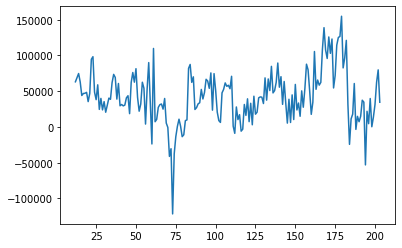

In [ ]:
df['fake_val'].plot()

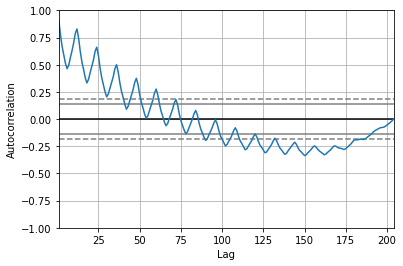

In [ ]:
import pandas
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['values'])
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

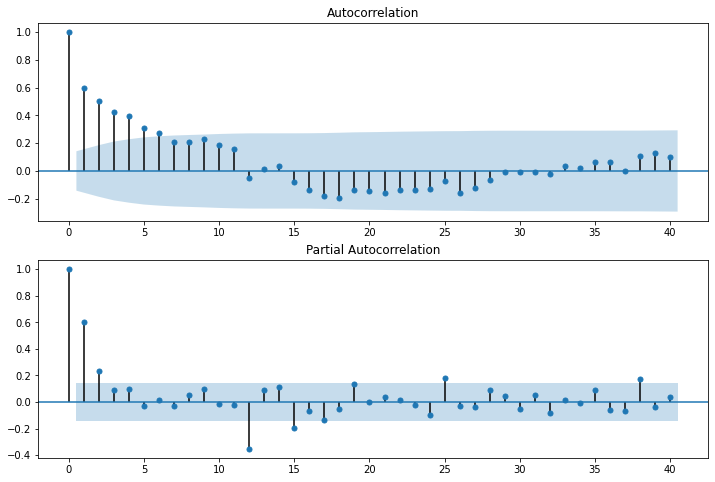

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['fake_val'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['fake_val'].iloc[13:],lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['values'],order=(2,1,3))
model_fit=model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.values   No. Observations:                  203
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2551.366
Method:                       css-mle   S.D. of innovations          68677.095
Date:                Wed, 20 Apr 2022   AIC                           5116.733
Time:                        14:48:59   BIC                           5139.925
Sample:                             1   HQIC                          5126.115
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3416.4061    262.889     12.996      0.000    2901.153    3931.659
ar.L1.D.values     0.3207      0.129      2.491      0.014       0.068       0.573
ar.L2.D.values    -0.0884      0.114     -0.774      0.440      -0.312       0.135
ma.L1.D.values    -0.1076      0.112     -0.958      0.339      -0.328       0.112
ma.L2.D.values    -0.2773      0.083     -3.357      0.001      -0.439      -0.115
ma.L3.D.values    -0.6151      0.071     -8.609      0.000      -0.755      -0.475
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8147           -2.8327j            3.3641           -0.1593
AR.2            1.8147           +2.8327j            3.3641            0.1593
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.7254           -1.0485j            1.2750           -0.3463
MA.3           -0.7254           +1.0485j            1.2750            0.3463
-----------------------------------------------------------------------------
"""

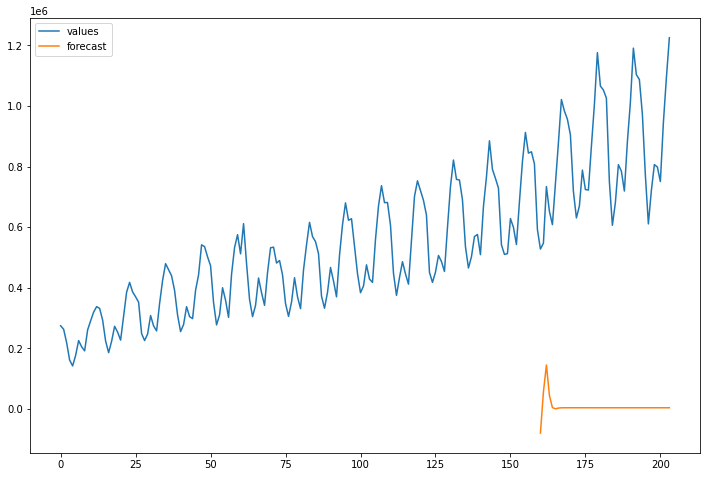

In [ ]:
df['forecast']=model_fit.predict(start=160,end=204,dynamic=True)
df[['values','forecast']].plot(figsize=(12,8));

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['values'],order=(3, 1, 0),seasonal_order=(3,1,0,12))
results=model.fit()

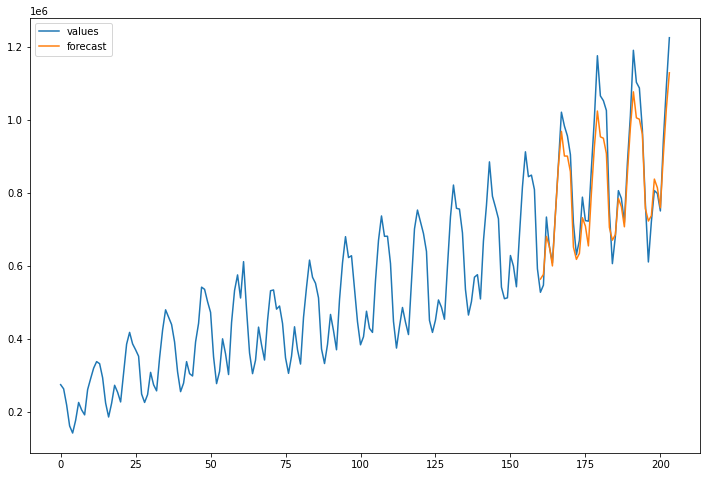

In [ ]:
df['forecast']=results.predict(start=160,end=204,dynamic=True)
df[['values','forecast']].plot(figsize=(12,8));

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ x for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,values,fake_val,forecast
222,NaN,NaN,NaN
223,NaN,NaN,NaN
224,NaN,NaN,NaN
225,NaN,NaN,NaN
226,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

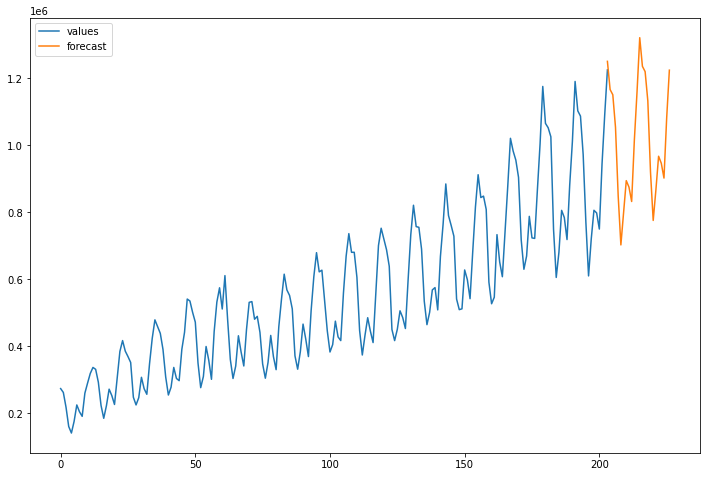

In [ ]:
future_df['forecast'] = results.predict(start = 203, end = 230, dynamic= True)  
future_df[['values', 'forecast']].plot(figsize=(12, 8));

In [ ]:
df.dropna()
df

,values,fake_val,forecast
0,274215,NaN,NaN
1,262692,NaN,NaN
2,218473,NaN,NaN
3,160941,NaN,NaN
4,141508,NaN,NaN
...,...,...,...
199,798587,13773.0,8.142623e+05
200,750514,31393.0,7.593663e+05
201,944233,62470.0,9.035439e+05
202,1091946,79818.0,1.031447e+06


In [ ]:
import sklearn
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(df['forecast'][160:],df['values'][160:])))

62657.93387683185
